In [ ]:
#import libraries
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

In [ ]:
#load data(replace with actual file path)
df=pd.read_csv('heart_disease.csv')

In [ ]:
#EDA(BASIC)-clean data prprocessing
print(df.describe())#check summary statistics
print(df.info())#check data types
print(df.isnull().sum())#check for missing values

              age         sex          cp  ...          ca        thal      target
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  ...    0.729373    2.313531    0.544554
std      9.082101    0.466011    1.032052  ...    1.022606    0.612277    0.498835
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     47.500000    0.000000    0.000000  ...    0.000000    2.000000    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.000000    1.000000
75%     61.000000    1.000000    2.000000  ...    1.000000    3.000000    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.000000    1.000000

[8 rows x 14 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex

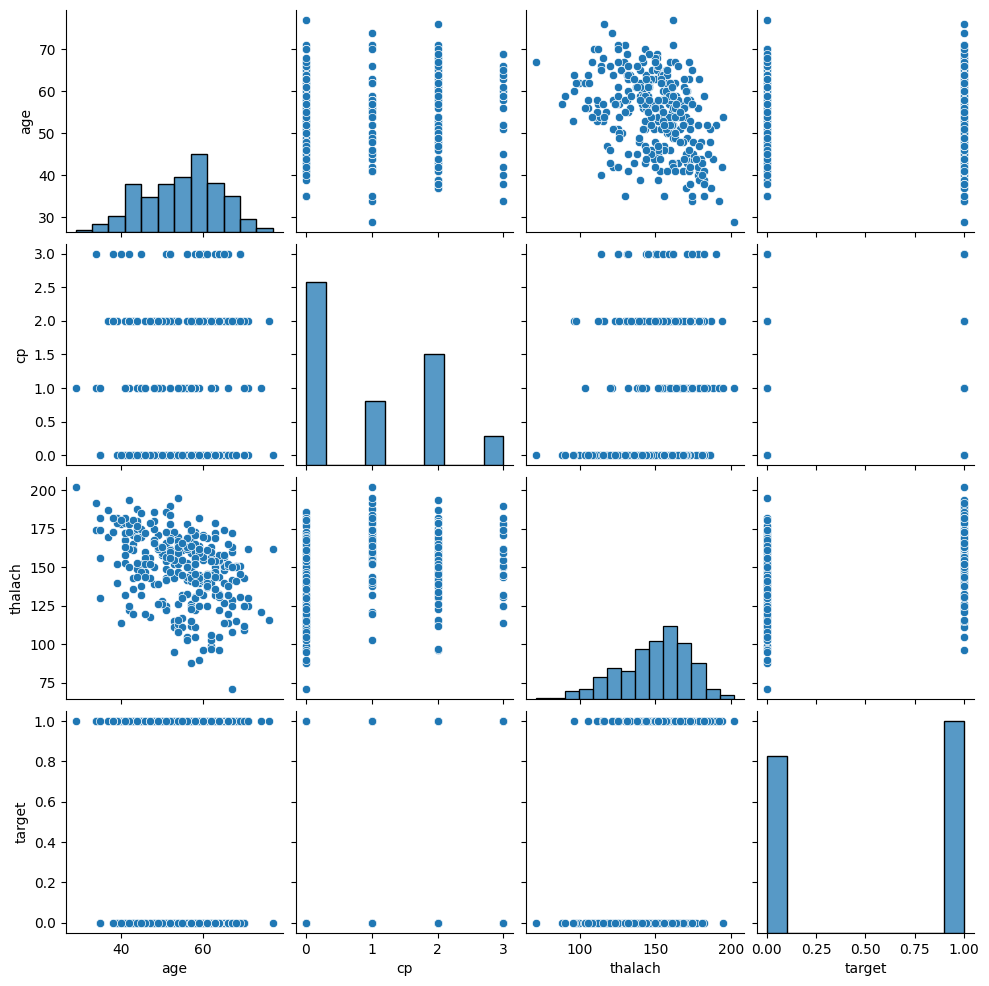

In [ ]:
sns.pairplot(df[['age','cp','thalach','target']])
plt.show()

In [ ]:
# feature and target selection
X=df[['age','cp','thalach']]
y=df[['target']]

In [ ]:
# split data and fit
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# model initialization and training
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# Predictions and performance metrics
y_pred=model.predict(X_test)
y_proba=model.predict_proba(X_test)[:,1]#no use of target
print(y_pred)

[0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1
 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0]


In [ ]:
#user input for prediction
def predict_heart_disease():
  age= int(input("Enter age: "))
  cp= int(input('Enter chest pain type (0-3): '))
  thalach= int(input('Enter maximum heart rate achieved: '))
  user_data=pd.DataFrame([[age,cp,thalach]], columns=['age','cp','thalach'])
  prediction=model.predict(user_data)
  if prediction[0]==1:
    print('Patient has heart disease')
  else:
    print('Patient does not have heart disease')
#call the user input function to test
predict_heart_disease()

Enter age: 80
Enter chest pain type (0-3): 0
Enter maximum heart rate achieved: 125
Patient does not have heart disease


In [ ]:
# prompt: accuracy calculate

# ... (Your existing code)

# Predictions and performance metrics
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
print(y_pred)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print other performance metrics
print(classification_report(y_test, y_pred))

# ... (rest of your code)

[0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1
 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0]
Accuracy: 0.8032786885245902
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.83      0.78      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

